In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input,Dense,SimpleRNN,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam


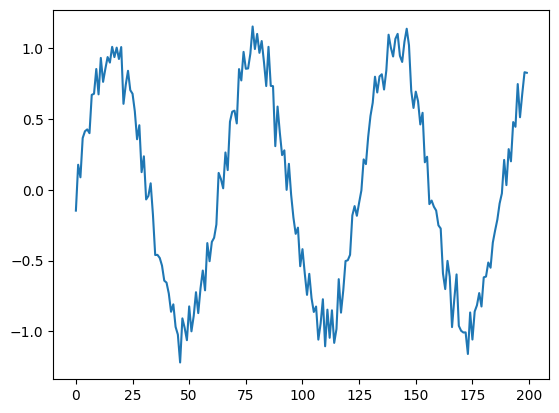

In [34]:
series=(np.sin(0.1*np.arange(200)))+np.random.randn(200)*0.1
plt.plot(series)

In [35]:
T=10
D=1
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)
X=np.array(X).reshape(-1,T,1)#data should be N*T*D
Y=np.array(Y)
N=len(X)
print(X.shape,Y.shape)

(190, 10, 1) (190,)


In [36]:
# model
i=Input(shape=(T,1))
x=SimpleRNN(5,activation=None)(i)
x=Dense(1)(x)
model=Model(i,x)
model.compile(
    loss="mse",
    optimizer=Adam(lr=0.1)

)

In [37]:
#training the model

r=model.fit(X[:-N//2],Y[:-N//2],validation_data=(X[:-N//2],Y[:-N//2]),epochs=150)

Epoch 1/150
3/3 [==============================] - 1s 85ms/step - loss: 0.9941 - val_loss: 0.9344
Epoch 2/150
3/3 [==============================] - 0s 13ms/step - loss: 0.9059 - val_loss: 0.8579
Epoch 3/150
3/3 [==============================] - 0s 14ms/step - loss: 0.8326 - val_loss: 0.7897
Epoch 4/150
3/3 [==============================] - 0s 15ms/step - loss: 0.7704 - val_loss: 0.7300
Epoch 5/150
3/3 [==============================] - 0s 22ms/step - loss: 0.7146 - val_loss: 0.6785
Epoch 6/150
3/3 [==============================] - 0s 14ms/step - loss: 0.6655 - val_loss: 0.6341
Epoch 7/150
3/3 [==============================] - 0s 22ms/step - loss: 0.6210 - val_loss: 0.5958
Epoch 8/150
3/3 [==============================] - 0s 14ms/step - loss: 0.5833 - val_loss: 0.5626
Epoch 9/150
3/3 [==============================] - 0s 14ms/step - loss: 0.5518 - val_loss: 0.5333
Epoch 10/150
3/3 [==============================] - 0s 13ms/step - loss: 0.5236 - val_loss: 0.5071
Epoch 11/150
3/3 [=

Text(0, 0.5, 'loss')

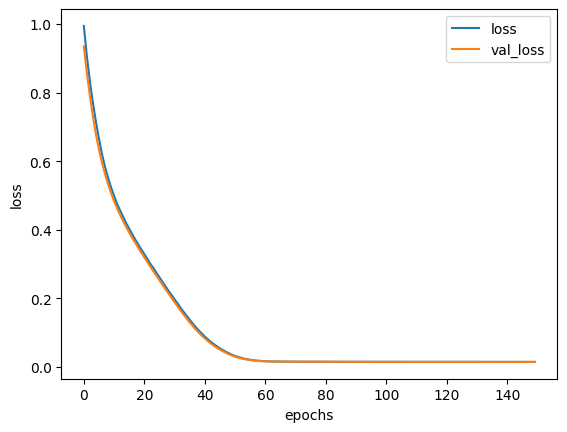

In [38]:
plt.plot(r.history['loss'],label="loss")
plt.plot(r.history['val_loss'],label="val_loss")
plt.legend(loc=0)
plt.xlabel("epochs")
plt.ylabel("loss")

In [39]:
validation_target=Y[-N//2:]
validation_predict=[]
i=-N//2
while len(validation_predict)<len(validation_target):
  p=model.predict(X[i].reshape(1,-1,1))[0,0]#1x1 array->scalar
  i+=1
  #update the prediction_list
  validation_predict.append(p)

1/1 [==============================] - 0s 15ms/step


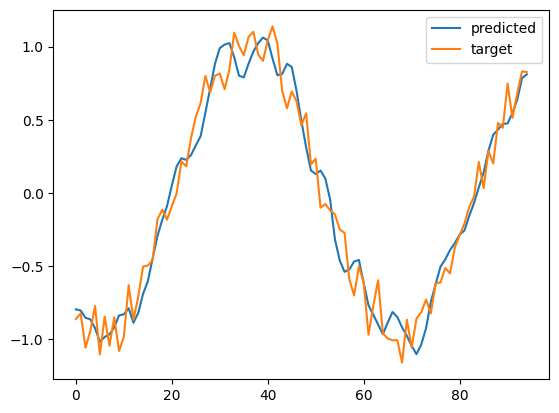

In [40]:
plt.plot(validation_predict,label="predicted")
plt.plot(validation_target,label="target")
plt.legend()

In [41]:
#forecast future values (use only self predictions for the making future predictions)
validation_target=Y[-N//2:]
validation_predict=[]
#last train input
last_x=X[-N//2]
while len(validation_predict)<len(validation_target):
  p=model.predict(last_x.reshape(1,-1,1))[0,0]#1x1 array->scalar
  #update the prediction_list
  validation_predict.append(p)
  #make the new input
  last_x=np.roll(last_x,-1)
  last_x[-1]=p

1/1 [==============================] - 0s 14ms/step


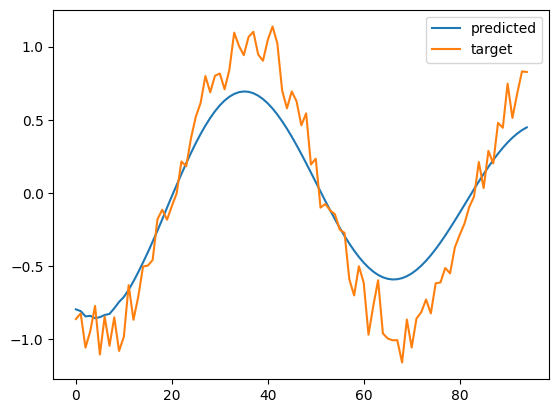

In [42]:
plt.plot(validation_predict,label="predicted")
plt.plot(validation_target,label="target")
plt.legend()